In [2]:
# 시각화를 위해 seabron 라이브러리를 불러옵니다. 
import seaborn as sns 

In [3]:
%ls data

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 2C12-07DF

 C:\Users\user\Jupyter_python\러닝스푼즈\기초\Ch3)Data_Visualization\data 디렉터리

2020-09-08  오후 02:29    <DIR>          .
2020-09-08  오후 02:29    <DIR>          ..
2020-09-07  오후 10:27    <DIR>          .ipynb_checkpoints
2020-03-22  오후 12:54           308,095 Sheltermap.html
2020-03-07  오후 02:06            85,057 서울시 대피소 방재시설 현황 (좌표계_ WGS1984).csv
               2개 파일             393,152 바이트
               3개 디렉터리  112,956,022,784 바이트 남음


In [4]:
# seaborn 에는 예제로 활용할 수 있는  데이터셋이 연결되어있습니다. tips 데이터셋을 불러오겠습니다. 
# 불러온 데이터 셋은 판다스의 데이터프레임 형식으로 판다스와 동일한 명령어를 사용할 수 있습니다. 
raw = sns.load_dataset('data/tips')

In [5]:
# head()를 통해 데이터를 살펴봅니다. 
raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
# info() 를 통해 데이터 구성 / 형식을 살펴봅니다
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
raw.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

## 데이터 분포 살펴보기(수치형)

- sns.`distplot`( df [ '컬럼명' ] )

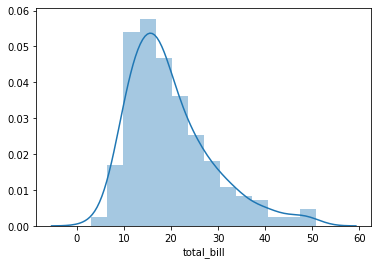

In [8]:
# sns.distplot() 을 이용해 데이터 분포를 히스토그램을 통해 살펴볼 수 있습니다. 
sns.distplot(raw['total_bill'])

##  데이터 분포 살펴보기(수치형 Vs 수치형)

### `relplot`( data = df, x = ,  y = , hue = , kind = 'scatter')
두 개의 변수(모두 수치형 데이터) 분포를 확인할 때

- kind 옵션
    - 'scatter' (기본값)
    - 'line'

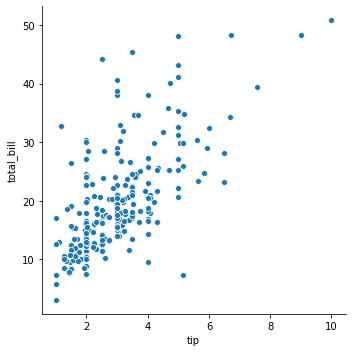

In [9]:
# sns.relplot() 을 이용해 두 데이터 간의 관계를 시각화할 수 있습니다 .
# kind 옵션을 이용해 표현 방식을 조정할 수 있는데, 기본 설정값은 scatter 입니다)
sns.relplot(x = 'tip', y = 'total_bill', data = raw) 
# kind 옵션 값 미지정시 "scatter"

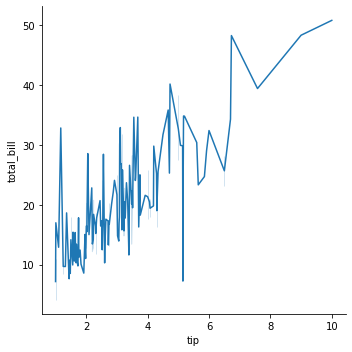

In [10]:
# kind 옵션을 line 으로 조정할 경우, 선 그래프를 그릴 수 있습니다. 
sns.relplot(x = 'tip', y = 'total_bill', data = raw, kind = 'line')  
# kind 옵션 값 미지정시 "scatter"

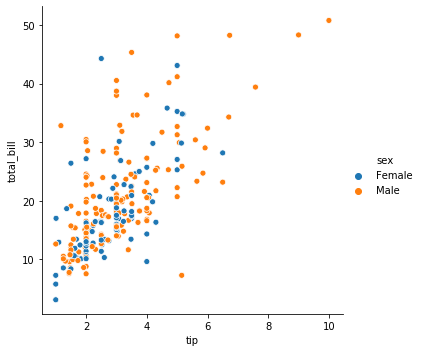

In [11]:
# 성별에 따라 색상 구분하기
# hue 옵션을 이용해 색상의 차이로 종류를 구분할 수 있습니다. 
sns.relplot(x = 'tip', y = 'total_bill', data = raw, hue = 'sex')

## 관계 살펴보기(수치형 Vs 수치형)

### `jointplot`( data = df, x = ,  y = , kind = 'scatter')


- kind에 따라 그래프 형대 변경됨
    - "scatter"(기본값): point   
    - "reg": point + regression
    - "kde": 누적 분포 차트 like 지도

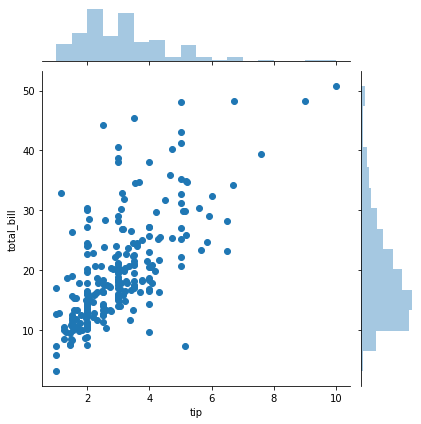

In [12]:
# jointplot을 이용해  두 수치데이터간의 관계와, 각 데이터의 분포를 함께 확인할 수 있습니다. 
# kind 옵션을 통해 여러 타입으로 시각화 할 수 있는데,  기본적으로 kind = 'scatter' 으로 지정되어있습니다. 
sns.jointplot(data = raw, x = 'tip', y = 'total_bill') 
# kind 값 미 지정시 기본 값은 kind = 'scatter'

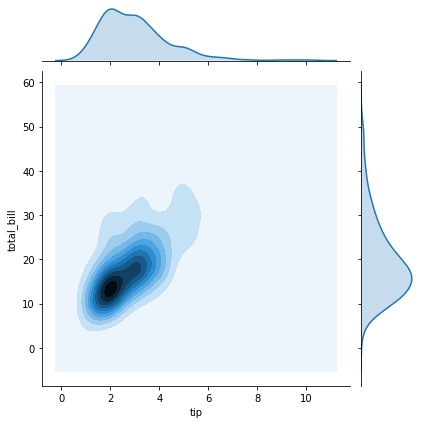

In [13]:
# kind = 'kde' 로 지정할 경우, 밀도함수를 이용해 시각화 할 수 있습니다. 
# 진하게 표시될 수록 집중되어있다는 것을 의미하며, 값이 급격하게 변할 수록 선의 간격이 좁게 표시됩니다. 
sns.jointplot(data = raw, x = 'tip', y = 'total_bill', kind = 'kde')  # 기본 값은 kind = 'scatter'

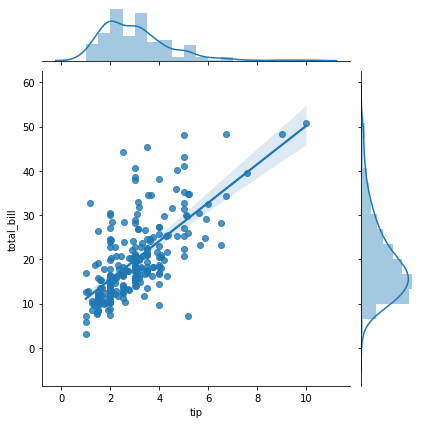

In [14]:
# kind = 'regg' 옵션을 사용할 경우, 회귀선을 확인할 수 있습니다. 
sns.jointplot(data = raw, x = 'tip', y = 'total_bill', kind = 'regg')  # 기본 값은 kind = 'scatter'

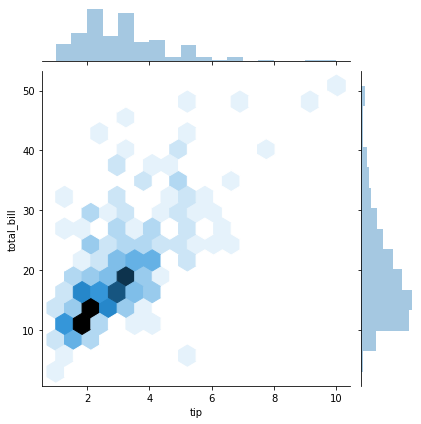

In [15]:
# kind = 'hex' 옵션은  kde 속성과 유사하게 밀도를 표현하나 kde 처럼 간격이 다르지 않고, 
# 간격이 모두 동일한 육각형 모양으로 시각화 합니다. 
sns.jointplot(data = raw, x = 'tip', y = 'total_bill', kind = 'hex')  # 기본 값은 kind = 'scatter'

### `pairplot`( data = df)
df의 모든 수치형데이터 컬럼에서 두 컬럼씩 관계를 시각화 합니다. 

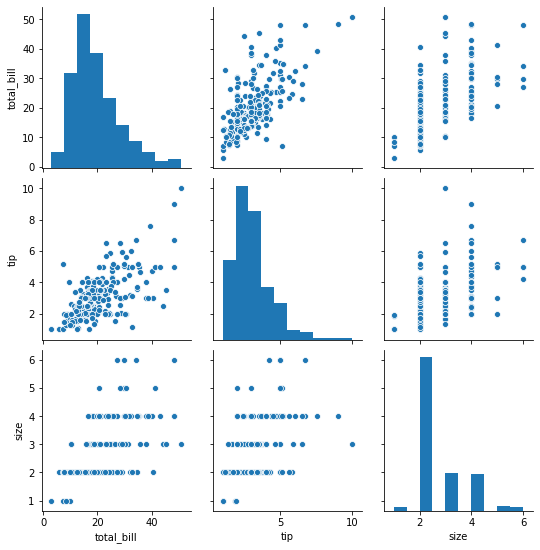

In [16]:
# pairplot을 이용해  total_bill, tip, size 데이터 간의 관계를 살펴보겠습니다. 
sns.pairplot(data = raw)

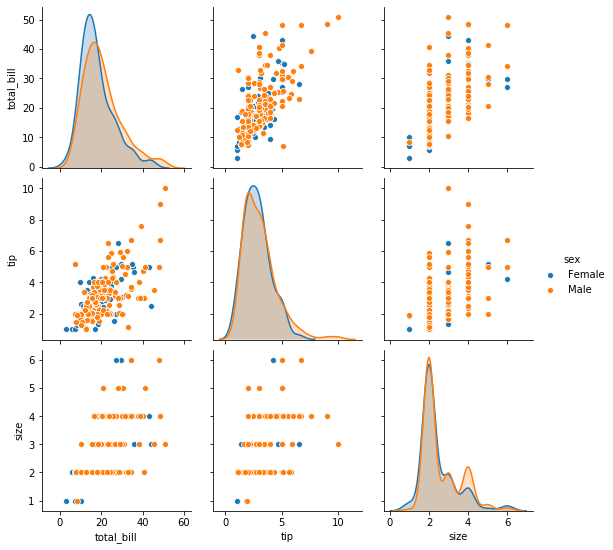

In [17]:
# hue 를 이용해, 특정 컬럼의 값에 따른 분포를 색상을 이용해 시각화 할 수 있습니다. 
sns.pairplot(data = raw, hue = 'sex')

## 데이터 분포 살펴보기(수치형 Vs 카테고리형)

`boxplot`( data = df, x = , y = , hue =  )


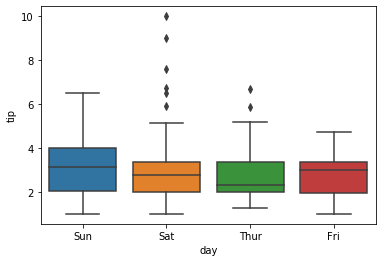

In [18]:
# boxplot을 이용해  가로축은 day 컬럼, 세로축은 tip 값의 분포로 박스플랏을 그릴 수 있습니다. 
sns.boxplot(data = raw, x = 'day', y = 'tip')

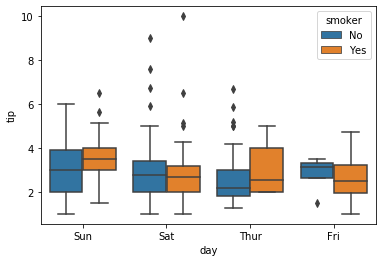

In [19]:
# hue 옵션을 추가하여, 특정 기준의 변화에 따른 데이터분포를 살펴볼 수 있습니다. 
sns.boxplot(data = raw, x = 'day', y = 'tip', hue = 'smoker')

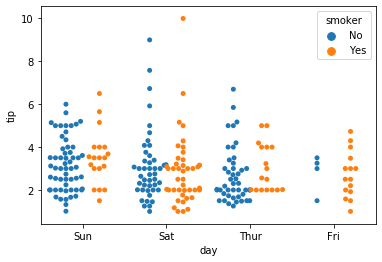

In [20]:
# boxplot의 경우는 하나의 기준에 대한 데이터 분포 범위를 파악하는데 용이하나
# 데이터의 개수를 표현하지는 않기 때문에,데이터 개수가 다른 값을 비교하기에는 문제가 있을 수 있습니다. 
# swarmplot 을 이용하면 데이터 개수와 함께 분포를 살펴볼 수 있습니다. 
sns.swarmplot(data = raw, x = 'day', y = 'tip', hue = 'smoker', dodge=True)

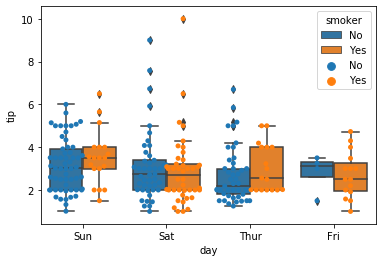

In [21]:
# boxplot과 swarmplot을 함께 그려볼 수 있습니다. 

sns.boxplot(data = raw, x = 'day', y = 'tip', hue = 'smoker')
sns.swarmplot(data = raw, x = 'day', y = 'tip', hue = 'smoker', dodge=True)

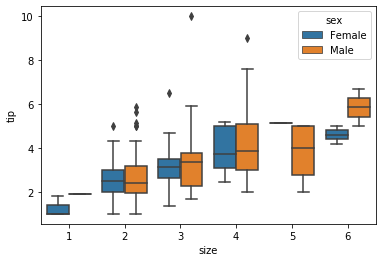

In [22]:
# 이번에는 size/성별 별 tip의 분포를 살펴보겠습니다. 
sns.boxplot(data = raw, x = 'size', y = 'tip', hue = 'sex')

`barplot`( data = df, x = , y = , hue =  )

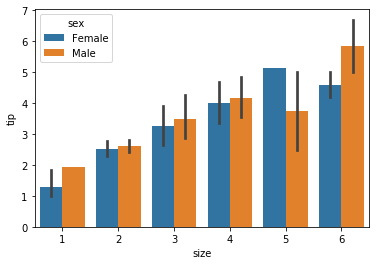

In [23]:
# barplot의 경우 특정 값에 대한 개수를 살펴볼 수 있습니다. 
sns.barplot(data = raw, x = 'size', y = 'tip', hue = 'sex')

## 데이터 분포 살펴보기(수치형 Vs 카테고리형 Vs 카테고리형))

`heatmap`( data = df )

In [24]:
# 히트맵을 이용하면, 두 카테고리형 데이터 분포에 대한 수치형데이터의 값을  한눈에 색상을 이용하여 한눈에 살펴볼 수 있습니다. 
# 요일별, size별  평균 tip 데이터를 가진 피벗테이블을 만들겠습니다. 
df = raw.pivot_table(index = 'day', columns = 'size', values = 'tip', aggfunc='mean')
df

size,1,2,3,4,5,6
day,,,,,,
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3


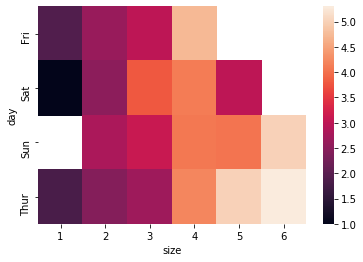

In [25]:
# 보고자하는 관점에 따라 데이터프레임을 만든 후,  heatmap() 함수를 이용하면 히트맵을 작성할 수 있습니다. 
sns.heatmap(data = df)

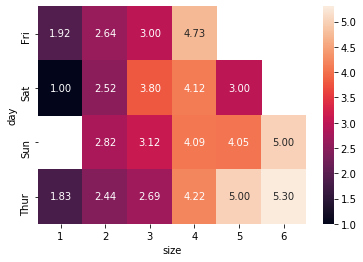

In [26]:
# 실제 데이터를 확인하기 위해, 히트맵 내에 수치를 표현할 수 있습니다. 
# annot = True 로 할 경우, 수치를 표현하며,  표현되는 숫자 형태는 fmt 옵션으로 지정할 수 있습니다. 
# fmt = ".2f" 의 경우, 0 두 소수점 두 자리까지 표현하라는 의미이며, 
# ".0f"의 경우 소수점 뒤에 표현되는 자리수 없이 정수로만 표현하라는 의미입니다. 
sns.heatmap(data = df, 
           annot = True, fmt = '.2f')

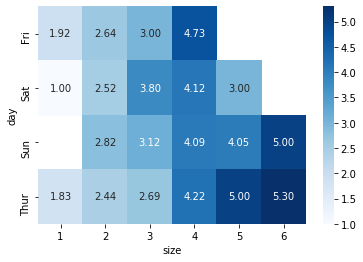

In [27]:
# cmap 옵션을 이용해, 색상을 조정할 수도 있습니다. 
# seaborn에서는 다양한 종류의 컬러차트를 지원하며, 이중 Blues 를 이용해보겠습니다. 
sns.heatmap(data = df, 
           annot = True, fmt = '0.2f',
           cmap = 'Blues')